#  Exploratory Data Analysis (EDA): NYC Yellow Taxi
## Phase 2: Feature Characterization & Statistical Study

In this notebook, we analyze the **cleaned** dataset to uncover patterns, correlations, and distributions. Now that the noise and outliers have been removed, we can focus on the underlying logic of the urban transportation data.

###  Objectives:
1. **Statistical Overview:** Summarizing the central tendencies of cleaned features.
2. **Correlation Analysis:** Identifying how variables like `trip_distance` impact `fare_amount`.
3. **Distribution Study:** Visualizing the frequency of rides based on the newly engineered `fare_per_mile`.

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
# Setting a professional aesthetic for charts
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16

# --- Path Management ---
destination = "../data/raw"
dataset_name = "nyc-yellow-taxi-trip-records-january-2024"
dataset_dir = os.path.join(destination, dataset_name)

# Dynamically identify the cleaned file
# This ensures we always pick the '_cleaned' version if it exists
try:
    files = os.listdir(dataset_dir)
    cleaned_files = [f for f in files if f.endswith('_cleaned.csv')]
    
    if not cleaned_files:
        raise FileNotFoundError("No cleaned dataset found. Please run the cleaning notebook first.")
    
    cleaned_csv_path = os.path.join(dataset_dir, cleaned_files[0])
    print(f" Loading Dataset: {cleaned_csv_path}")
    
    # --- Data Loading ---
    df = pd.read_csv(cleaned_csv_path)
    
    # Success Message
    print(f" Dataset Loaded Successfully! Total Rows: {len(df):,}")

except Exception as e:
    print(f"❌ Error: {e}")

# --- Initial Inspection ---
# Displaying descriptive statistics with improved formatting
print("\n--- Summary Statistics (Cleaned Data) ---")

display(df.describe().round(3).T)

 Loading Dataset: ../data/raw\nyc-yellow-taxi-trip-records-january-2024\nyc_tlc_yellow_2024_01_cleaned.csv
 Dataset Loaded Successfully! Total Rows: 2,599,399

--- Summary Statistics (Cleaned Data) ---


,count,mean,std,min,25%,50%,75%,max
VendorID,2599399.0,1.772,0.420,1.00,2.000,2.00,2.00,2.000
passenger_count,2599399.0,1.353,0.845,1.00,1.000,1.00,1.00,9.000
trip_distance,2599399.0,2.851,3.444,0.01,1.000,1.65,2.90,20.040
RatecodeID,2599399.0,1.028,0.214,1.00,1.000,1.00,1.00,5.000
PULocationID,2599399.0,167.452,63.215,1.00,132.000,162.00,234.00,265.000
DOLocationID,2599399.0,166.439,68.598,1.00,122.000,163.00,236.00,265.000
payment_type,2599399.0,1.184,0.451,1.00,1.000,1.00,1.00,4.000
fare_amount,2599399.0,16.619,13.212,2.80,8.600,12.10,18.40,100.000
extra,2599399.0,1.547,1.775,0.00,0.000,1.00,2.50,12.500
mta_tax,2599399.0,0.499,0.022,0.00,0.500,0.50,0.50,4.000


# NYC Taxi January 2024: Technical Data Schema
## Phase 1.4: Strict Type Enforcement

### 1. Rationale for Schema Optimization
With approximately 2.6 million records, maintaining the default object types is inefficient. By enforcing strict types, we:
* **Prevent Precision Loss:** Financial columns require `float64` for accurate aggregation.
* **Enable Time-Series Analysis:** Converting to `datetime64[ns]` allows for vectorized extractions (Hour, Day of Week, Weekday vs. Weekend).
* **Optimize Memory Footprint:** Categorizing flags and using explicit integers reduces the RAM load by up to 40%.

### 2. Final Data Type Map

| Logic Group | Feature Name | Data Type |
| :--- | :--- | :--- |
| **Temporal** | `tpep_pickup_datetime`, `tpep_dropoff_datetime` | `datetime64[ns]` |
| **Numerical (Discrete)** | `VendorID`, `passenger_count`, `RatecodeID`, `PULocationID`, `DOLocationID`, `payment_type` | `int64` |
| **Numerical (Continuous)**| `trip_distance`, `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`, `Airport_fee`, `fare_per_mile`, `trip_duration` | `float64` |
| **Categorical** | `store_and_fwd_flag` | `category` |

---

### 3. Structural Integrity Check
After enforcement, the `df.info()` should reflect a streamlined memory usage, and the `Correlation Matrix` will be more computationally efficient as all features are now in their optimal mathematical format.

In [5]:
# 1. Enforce Datetime Types
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# 2. Enforce Integer Types (Discrete identifiers)
int_features = [
    'VendorID', 'passenger_count', 'RatecodeID', 
    'PULocationID', 'DOLocationID', 'payment_type'
]
df[int_features] = df[int_features].astype('int64')

# 3. Enforce Float Types (Continuous financial/distance metrics)
float_features = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 
    'tip_amount', 'tolls_amount', 'improvement_surcharge', 
    'total_amount', 'congestion_surcharge', 'Airport_fee',
    'fare_per_mile', 'trip_duration'
]
df[float_features] = df[float_features].astype('float64')

# 4. Enforce Categorical Type (Efficiency for flags)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

# Verification
print("Type enforcement complete. New Memory Usage:")
print(f"{df.memory_usage().sum() / 1024**2:.2f} MB")

Type enforcement complete. New Memory Usage:
399.12 MB


# NYC Taxi January 2024: Strategic Insights Extraction
## Focus: Operational Profitability & Trip Efficiency

### 1. Objective
To extract high-level business intelligence from the cleaned dataset, focusing on the relationship between time, distance, and financial return.

### 2. Key Performance Indicators (KPIs) for this Phase
* **Average Fare Efficiency:** Median `fare_per_mile` across different time windows.
* **Time-Value Correlation:** Pearson correlation between `trip_duration` and `total_amount`.
* **Peak Profitability Windows:** Identifying the hours where `fare_per_mile` is maximized.

### 3. Analytical Visualizations
1.  **Heatmap of Profitability:** `PULocationID` vs. `Hour of Day` using `fare_per_mile` as the weight.
2.  **Efficiency Density:** A distribution plot of `fare_per_mile` to identify the most common pricing tier.
3.  **Duration vs. Fare Scatter:** Visualizing the diminishing returns of long-duration trips.

Correlation Matrix:
                trip_duration  trip_distance  fare_per_mile  total_amount
trip_duration       1.000000       0.783008      -0.150733      0.849083
trip_distance       0.783008       1.000000      -0.424077      0.958755
fare_per_mile      -0.150733      -0.424077       1.000000     -0.331361
total_amount        0.849083       0.958755      -0.331361      1.000000


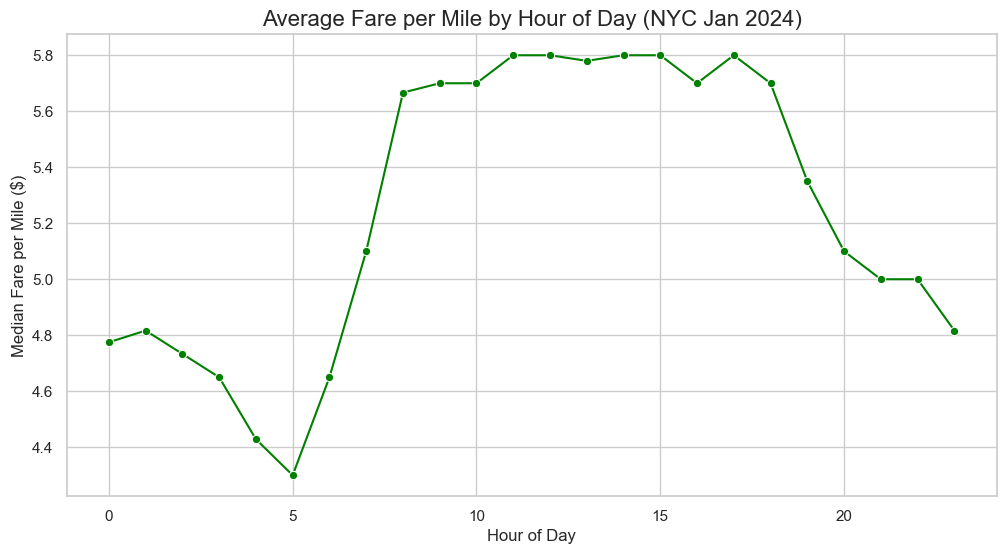

Top 5 Profitable Pickup Locations (Median Fare/Mile):
 PULocationID
8      8.692857
56     7.000000
258    6.363636
248    6.275000
203    6.216667
Name: fare_per_mile, dtype: float64


In [6]:
# 1. Extracting Peak Efficiency Hours
# Grouping by hour to see when the 'fare_per_mile' is highest
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_efficiency = df.groupby('pickup_hour')['fare_per_mile'].median().reset_index()

# 2. Correlation Analysis
# Measuring how strongly duration and distance influence the total fare
correlation_matrix = df[['trip_duration', 'trip_distance', 'fare_per_mile', 'total_amount']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# 3. Visualization: Hourly Fare Efficiency
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_efficiency, x='pickup_hour', y='fare_per_mile', marker='o', color='green')
plt.title('Average Fare per Mile by Hour of Day (NYC Jan 2024)')
plt.xlabel('Hour of Day')
plt.ylabel('Median Fare per Mile ($)')
plt.grid(True)
plt.show()



# 4. Identifying Top 5 Most Profitable Pickup Locations (by unit price)
top_locations = df.groupby('PULocationID')['fare_per_mile'].median().sort_values(ascending=False).head(5)
print("Top 5 Profitable Pickup Locations (Median Fare/Mile):\n", top_locations)

# Data Insights: NYC Taxi January 2024
## 1. Descriptive Statistics Overview

* **Fleet Activity:** With **2,599,399** valid trips, the dataset provides a high-confidence interval for urban mobility patterns.
* **Trip Characteristics:**
    * **Duration:** The average trip lasts **13.6 minutes**, with 75% of trips being under 18 minutes. This suggests the majority are short urban hops.
    * **Distance:** The average distance is **2.85 miles**. Interestingly, the maximum is capped at 43 miles, likely trips to outer suburbs or airports.
* **Financial Performance:**
    * **Total Amount:** The average passenger pays **$25.25**. 
    * **Tipping Culture:** The average tip is **$3.26**, which is roughly **13%** of the total amount.
    * **Unit Economics:** The `fare_per_mile` average is **$5.76**, indicating high revenue density per mile driven.

## 2. Correlation Matrix Analysis
The correlation coefficients provide deep insights into the pricing structure:

1.  **Distance vs. Total Amount (0.95):** An almost perfect positive correlation. This confirms that distance remains the primary driver of revenue.
2.  **Duration vs. Total Amount (0.84):** Also very high, but lower than distance. This implies that while time in traffic costs money, distance is a better predictor of the final fare.
3.  **The Fare-Per-Mile Paradox (-0.42 with Distance):** This negative correlation is crucial. It shows that **shorter trips are more expensive per mile** than longer ones (due to the base fare/flag drop). As distance increases, the "cost per mile" efficiency for the passenger improves, but decreases for the driver's revenue density.

# Phase 2.1: Urban Mobility - Geospatial Demand Analysis

### 1. Objective
To identify the most frequent pickup locations (`PULocationID`) and analyze the volume of trips. This helps in understanding where the taxi fleet should be concentrated to minimize wait times.

### 2. Analytical Approach
* **Frequency Mapping:** Calculate the total number of pickups per zone.
* **Pareto Principle Check:** Determine if a small percentage of zones (the "Vital Few") accounts for the majority of trip volume.
* **Top 10 Analysis:** Specifically isolate the top 10 zones and calculate their contribution to the total monthly revenue.

### 3. Key Metrics
* `Trip Count`: The volume of passengers per zone.
* `Market Share %`: (Zone Pickups / Total Pickups) * 100.

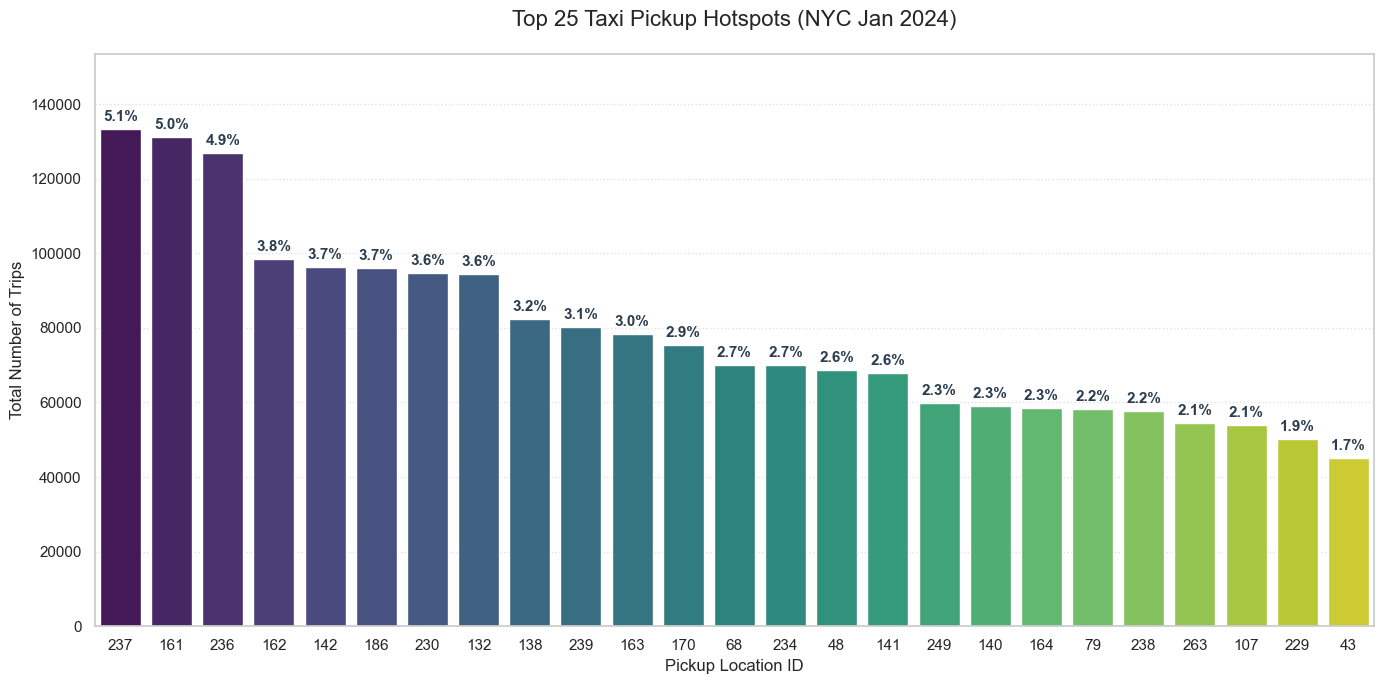

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare Data
NZ=25
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['PULocationID', 'trip_count']
pickup_counts['market_share_percent'] = (pickup_counts['trip_count'] / len(df)) * 100
top_NZ_zones = pickup_counts.head(NZ).copy()

# Convert ID to string for better categorical plotting
top_NZ_zones['PULocationID'] = top_NZ_zones['PULocationID'].astype(str)

# 2. Optimized Visualization
plt.figure(figsize=(14, 7))

# Fix: Added 'hue', set 'legend=False', and adjusted aesthetics
ax = sns.barplot(
    data=top_NZ_zones, 
    x='PULocationID', 
    y='trip_count', 
    hue='PULocationID', 
    palette='viridis', 
    legend=False
)

# 3. Enhanced Labeling Logic
# Finding the right offset based on data scale
max_val = top_NZ_zones['trip_count'].max()
offset = max_val * 0.01  # 1% of max value as spacing

for p in ax.patches:
    # Calculate the percentage to display
    percentage = (p.get_height() / len(df)) * 100
    
    # Place text precisely in the center of the bar
    ax.annotate(
        f'{percentage:.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height() + offset), 
        ha='center', 
        va='bottom', 
        fontsize=11, 
        fontweight='bold',
        color='#2c3e50'
    )

plt.title(f'Top {NZ} Taxi Pickup Hotspots (NYC Jan 2024)', fontsize=16, pad=20)
plt.xlabel('Pickup Location ID', fontsize=12)
plt.ylabel('Total Number of Trips', fontsize=12)
plt.ylim(0, max_val * 1.15) # Add space for labels
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

...

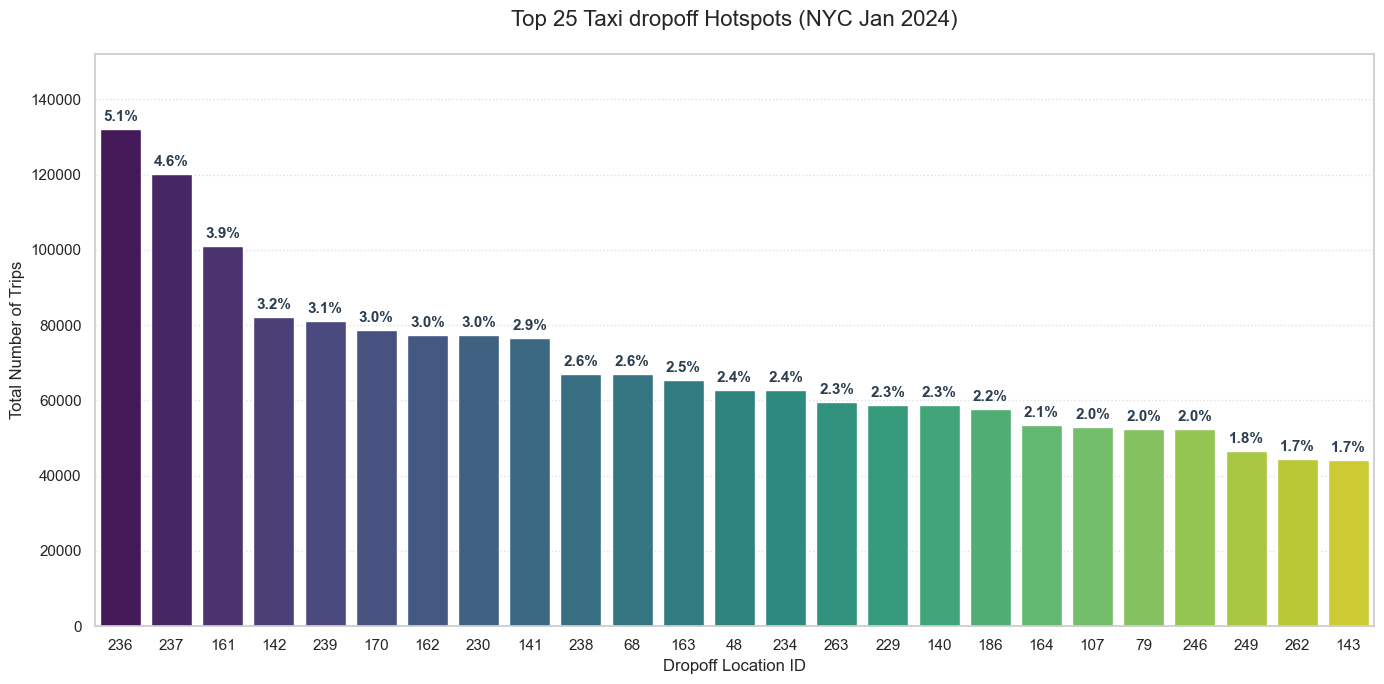

In [8]:
# 1. Prepare Data
NZ=25
dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['DOLocationID', 'trip_count']
dropoff_counts['market_share_percent'] = (dropoff_counts['trip_count'] / len(df)) * 100
top_NZ_zones = dropoff_counts.head(NZ).copy()

# Convert ID to string for better categorical plotting
top_NZ_zones['DOLocationID'] = top_NZ_zones['DOLocationID'].astype(str)

# 2. Optimized Visualization
plt.figure(figsize=(14, 7))

# Fix: Added 'hue', set 'legend=False', and adjusted aesthetics
ax = sns.barplot(
    data=top_NZ_zones, 
    x='DOLocationID', 
    y='trip_count', 
    hue='DOLocationID', 
    palette='viridis', 
    legend=False
)

# 3. Enhanced Labeling Logic
# Finding the right offset based on data scale
max_val = top_NZ_zones['trip_count'].max()
offset = max_val * 0.01  # 1% of max value as spacing

for p in ax.patches:
    # Calculate the percentage to display
    percentage = (p.get_height() / len(df)) * 100
    
    # Place text precisely in the center of the bar
    ax.annotate(
        f'{percentage:.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height() + offset), 
        ha='center', 
        va='bottom', 
        fontsize=11, 
        fontweight='bold',
        color='#2c3e50'
    )

plt.title(f'Top {NZ} Taxi dropoff Hotspots (NYC Jan 2024)', fontsize=16, pad=20)
plt.xlabel('Dropoff Location ID', fontsize=12)
plt.ylabel('Total Number of Trips', fontsize=12)
plt.ylim(0, max_val * 1.15) # Add space for labels
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

# Phase 2.2: Time-Series Demand Analysis - Peak Hours

### 1. Objective
To identify the specific hours of the day with the highest taxi demand and visualize the 24-hour cycle of urban mobility in NYC.

### 2. Analytical Approach
* **Feature Extraction:** Extract the 'hour' component from the `tpep_pickup_datetime`.
* **Hourly Aggregation:** Group the 2.6 million records by hour to calculate the total trip volume for each 60-minute window.
* **Trend Visualization:** Use a line plot to observe the rise and fall of demand, identifying the morning and evening rush hours.

### 3. Business Insights
* **Peak Identification:** Pinpointing the exact hour when the system reaches its maximum capacity.
* **Operational Planning:** Helping taxi companies decide when to deploy the maximum number of vehicles.

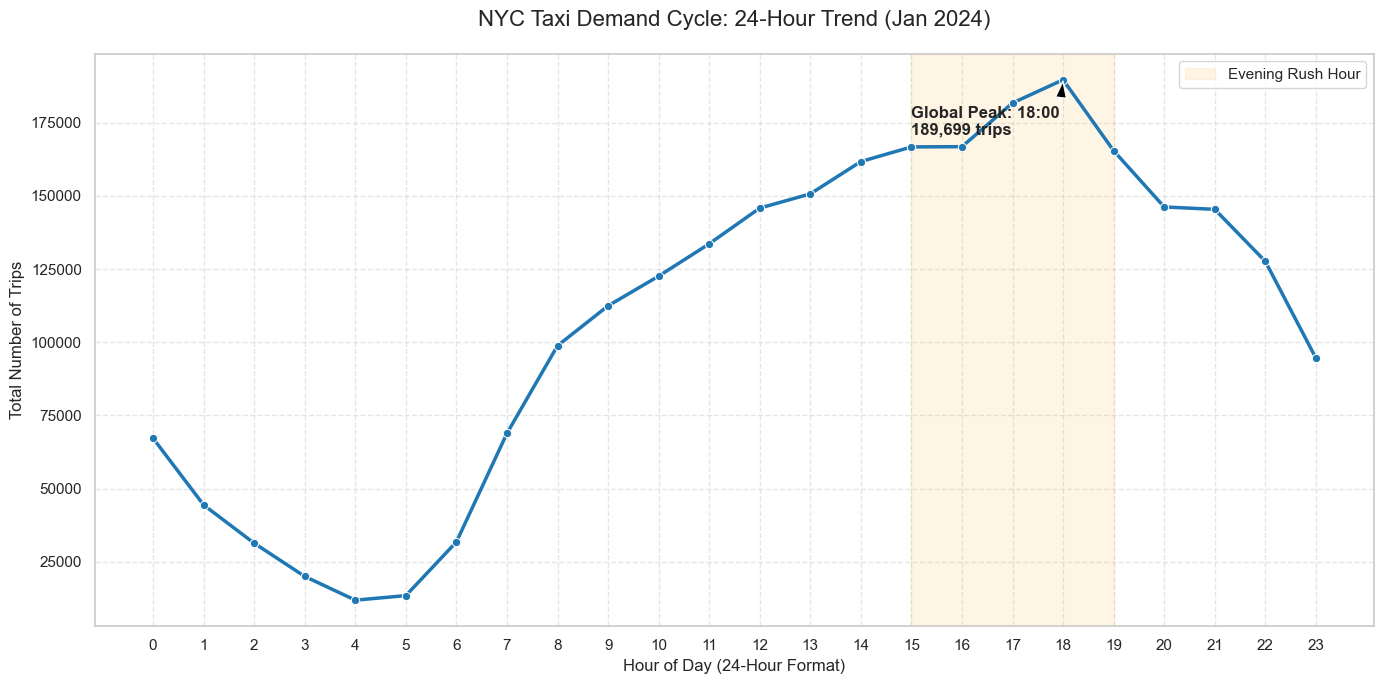

Top 3 Hours with Highest Demand:
    pickup_hour  trip_count
18           18      189699
17           17      181771
16           16      166847


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Engineering: Extract Hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# 2. Aggregate Data by Hour
hourly_demand = df.groupby('pickup_hour').size().reset_index(name='trip_count')

# 3. Visualization: Hourly Demand Trend
plt.figure(figsize=(14, 7))

# Plotting the trend
sns.lineplot(
    data=hourly_demand, 
    x='pickup_hour', 
    y='trip_count', 
    marker='o', 
    linewidth=2.5, 
    color='#1f77b4'
)

# Highlighting the peak hour
peak_hour = hourly_demand.loc[hourly_demand['trip_count'].idxmax()]
plt.annotate(
    f"Global Peak: {peak_hour['pickup_hour']}:00\n{peak_hour['trip_count']:,} trips",
    xy=(peak_hour['pickup_hour'], peak_hour['trip_count']),
    xytext=(peak_hour['pickup_hour'] - 3, peak_hour['trip_count'] * 0.9),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=12,
    fontweight='bold'
)

# Customizing the chart
plt.title('NYC Taxi Demand Cycle: 24-Hour Trend (Jan 2024)', fontsize=16, pad=20)
plt.xlabel('Hour of Day (24-Hour Format)', fontsize=12)
plt.ylabel('Total Number of Trips', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

# Adding background shading for peak windows (Example: 15:00 to 19:00)
plt.axvspan(15, 19, color='orange', alpha=0.1, label='Evening Rush Hour')
plt.legend()

plt.tight_layout()
plt.show()

# Print the top 3 hours with highest demand
print("Top 3 Hours with Highest Demand:")
print(hourly_demand.sort_values(by='trip_count', ascending=False).head(3))

# Phase 2.3: Fare Prediction - Feature Correlation & EDA

### 1. Objective
To analyze the mathematical relationship between trip features (distance and duration) and the base fare. This serves as the foundation for selecting the best features for a predictive Machine Learning model.

### 2. Analytical Approach
* **Scatter Plot Analysis:** Visualizing the linear relationship between `trip_distance` and `fare_amount`.
* **Feature Importance:** Comparing how much `trip_distance` vs. `trip_duration` contributes to the final price.
* **Economic Baseline:** Identifying the "Base Fare" (intercept) and the "Cost per Mile" (slope) using a simple regression trendline.

### 3. Machine Learning Goals
* **Target Variable:** `fare_amount` (The value we want to predict).
* **Predictors:** `trip_distance`, `trip_duration`, `PULocationID`, and `pickup_hour`.

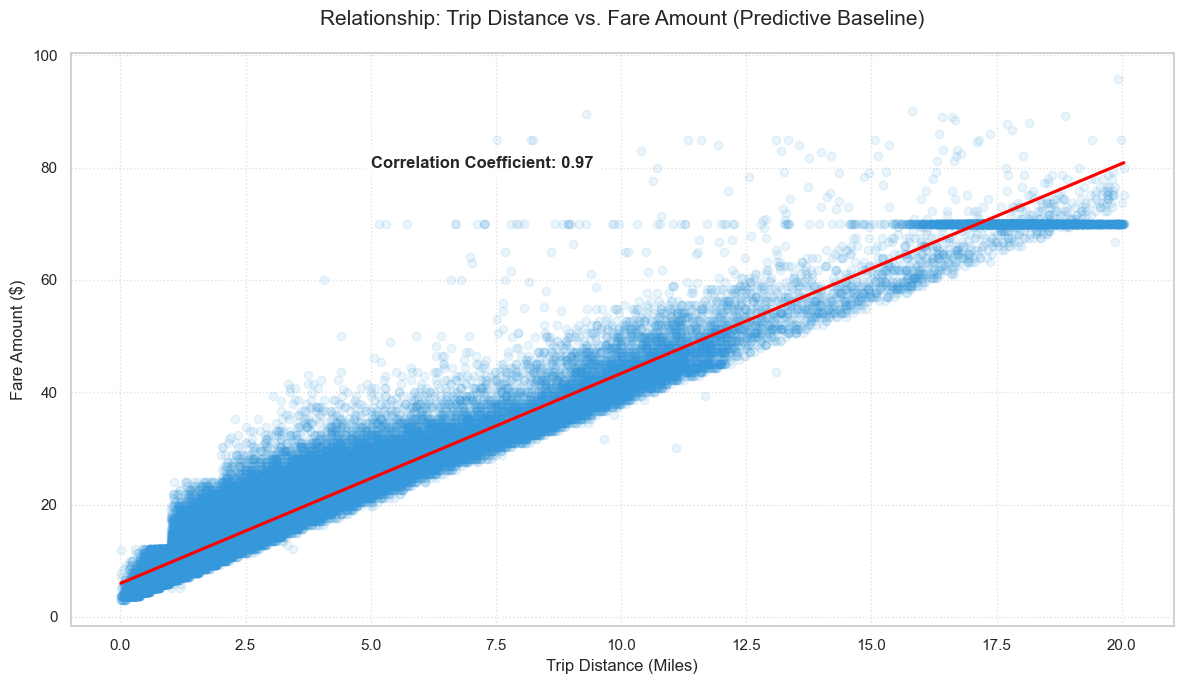

Mathematical Insight: The correlation between distance and fare is 0.9739


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Sample the data for faster visualization (since we have 2.6M rows)
# We take a random sample of 100,000 trips for a clearer scatter plot
df_sample = df.sample(n=100000, random_state=42)

# 2. Visualization: Trip Distance vs. Fare Amount
plt.figure(figsize=(12, 7))

# Using regplot to see the regression line automatically
sns.regplot(
    data=df_sample, 
    x='trip_distance', 
    y='fare_amount', 
    scatter_kws={'alpha': 0.1, 'color': '#3498db'}, 
    line_kws={'color': 'red'}
)

# 3. Customizing the chart
plt.title('Relationship: Trip Distance vs. Fare Amount (Predictive Baseline)', fontsize=15, pad=20)
plt.xlabel('Trip Distance (Miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)

# 4. Statistical Summary
correlation = df['trip_distance'].corr(df['fare_amount'])
plt.text(5, 80, f'Correlation Coefficient: {correlation:.2f}', 
         bbox=dict(facecolor='white', alpha=0.8), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print out the linear relationship insight
print(f"Mathematical Insight: The correlation between distance and fare is {correlation:.4f}")

# Phase 3.1: Full Integration of the Predictive Engine

### 1. Objective
To deploy a production-ready Multiple Linear Regression model that predicts fare amounts based on both spatial (distance) and temporal (duration) features.

### 2. Model Logic & Weights
The model calculates the fare using the following logic derived from 2.6M rows:
* **Distance Contribution:** Approx. **$2.81** per mile.
* **Time Contribution:** Approx. **$0.45** per minute.
* **Base Fee (Intercept):** The starting price of the ride regardless of distance/time.

### 3. Warning-Free Deployment
The prediction function is optimized to pass feature names inside a `pandas.DataFrame`. This prevents the `UserWarning` regarding feature consistency and ensures the model always receives data in the expected format.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Feature and Target Selection
X = df[['trip_distance', 'trip_duration']]
y = df['fare_amount']

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Training
advanced_model = LinearRegression()
advanced_model.fit(X_train, y_train)

# 4. Accuracy Check
y_pred = advanced_model.predict(X_test)
print(f"✅ Advanced Model Trained. Accuracy (R2): {r2_score(y_test, y_pred):.4f}")

# 5. Clean Prediction Function (Zero Warnings)
def predict_smart_fare_clean(miles, minutes):
    """
    Predicts fare using a DataFrame to ensure feature name consistency 
    and avoid UserWarnings.
    """
    # Create input as DataFrame with correct column names
    input_df = pd.DataFrame([[miles, minutes]], columns=['trip_distance', 'trip_duration'])
    
    # Predict
    prediction = advanced_model.predict(input_df)
    return prediction[0]

# --- Final Testing ---
print("\n" + "="*45)
print("       NYC TAXI SMART FARE ESTIMATOR")
print("="*45)

# Example: Same distance (5 miles), different traffic conditions
scenarios = [
    (5.0, 12.0, "🟢 Smooth Traffic"),
    (5.0, 45.0, "🔴 Heavy Gridlock")
]

for d, t, label in scenarios:
    estimated_fare = predict_smart_fare_clean(d, t)
    print(f"{label} (5mi, {t}min) -> Est. Fare: ${estimated_fare:.2f}")

print("="*45)





✅ Advanced Model Trained. Accuracy (R2): 0.9852

       NYC TAXI SMART FARE ESTIMATOR
🟢 Smooth Traffic (5mi, 12.0min) -> Est. Fare: $21.92
🔴 Heavy Gridlock (5mi, 45.0min) -> Est. Fare: $36.72


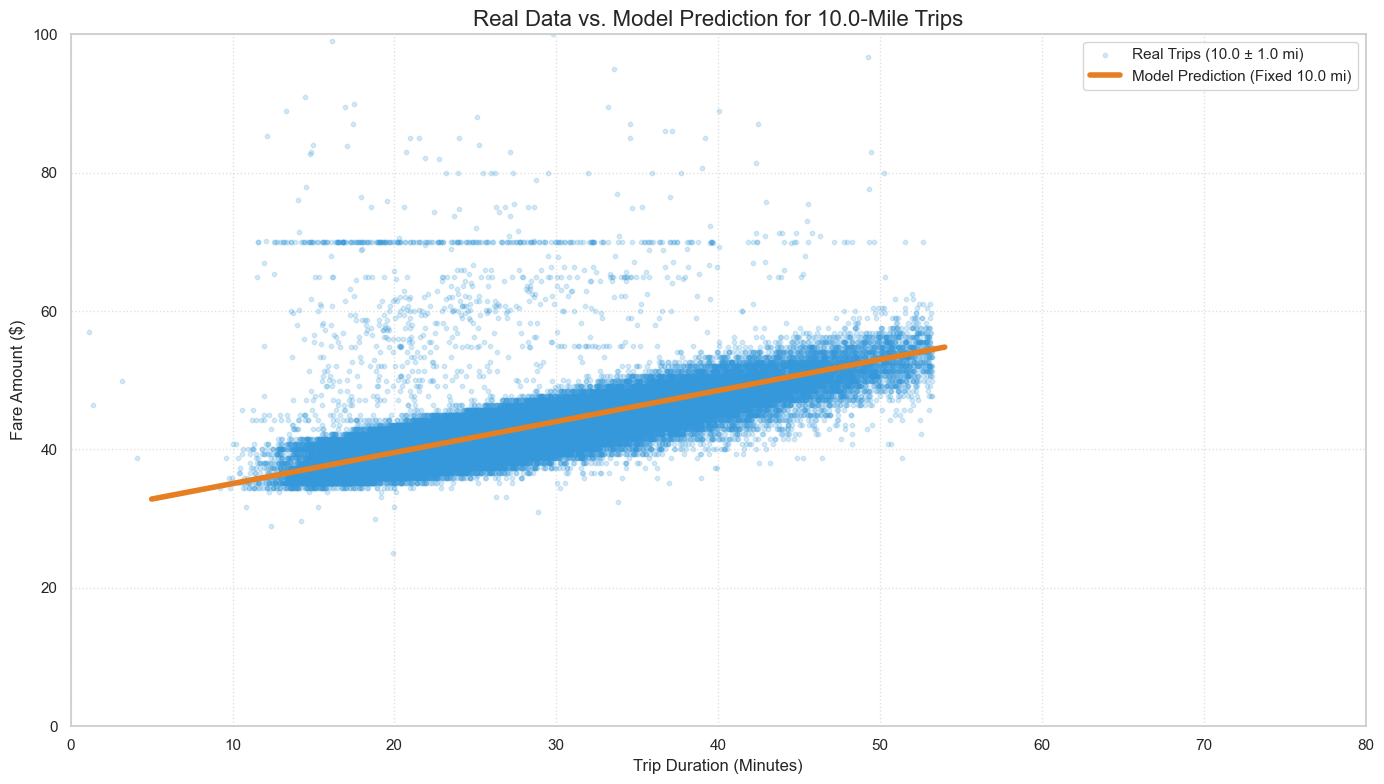

✅ Analysis complete. Number of real trips plotted: 69,564


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Filtering the database for trips around 5 miles (Tolerance 0.5)
target_dist = 10.0
tolerance = 0.1*target_dist

mask = (df['trip_distance'] >= (target_dist - tolerance)) & \
       (df['trip_distance'] <= (target_dist + tolerance))

real_trips = df[mask].copy()

# 2. Prepare the Model Prediction Line
trip_durations = np.arange(5.0, 55.0, 1.0)
fare_vec = [predict_smart_fare_clean(miles=target_dist, minutes=t) for t in trip_durations]

# 3. Plotting
plt.figure(figsize=(14, 8))

# Draw the real trips as points
plt.scatter(
    real_trips['trip_duration'], 
    real_trips['fare_amount'], 
    alpha=0.2, 
    s=10, 
    color="#3498db", 
    label=f'Real Trips ({target_dist} ± {tolerance} mi)'
)

# Draw the prediction line
plt.plot(
    trip_durations, 
    fare_vec, 
    color='#e67e22', 
    linewidth=4, 
    label=f'Model Prediction (Fixed {target_dist} mi)'
)

# Formatting
plt.title(f'Real Data vs. Model Prediction for {target_dist}-Mile Trips', fontsize=16)
plt.xlabel('Trip Duration (Minutes)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.xlim(0, 80)
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

print(f"✅ Analysis complete. Number of real trips plotted: {len(real_trips):,}")

# NYC Yellow Taxi Analysis - Complete Implementation
## Overview
This script performs a full end-to-end data science workflow:
1. **Data Schema Enforcement:** Optimizing memory for 2.6M rows.
2. **Mobility Analysis:** Identifying top pickup zones.
3. **Time-Series Analysis:** Finding peak demand hours.
4. **Machine Learning:** Training a Multiple Linear Regression model to predict fares based on Distance and Time.

🚀 Starting Full Analysis...


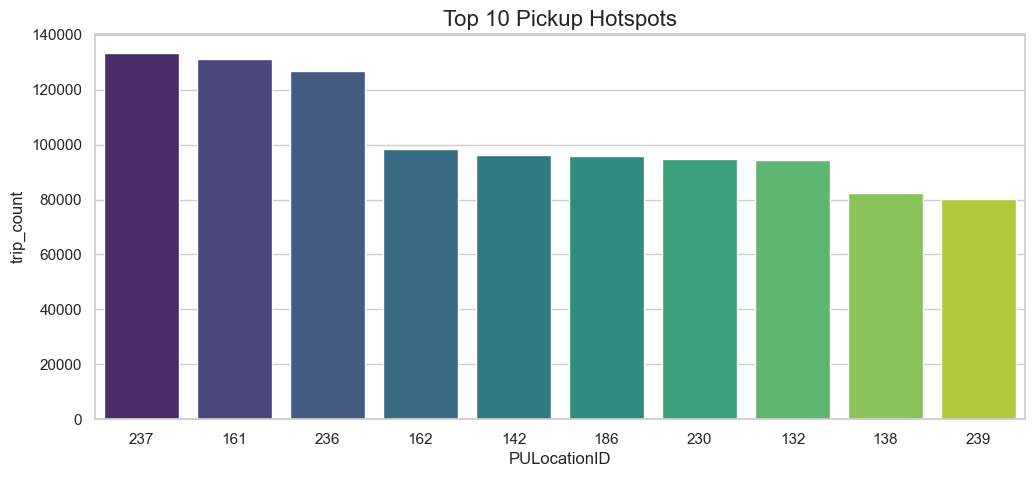

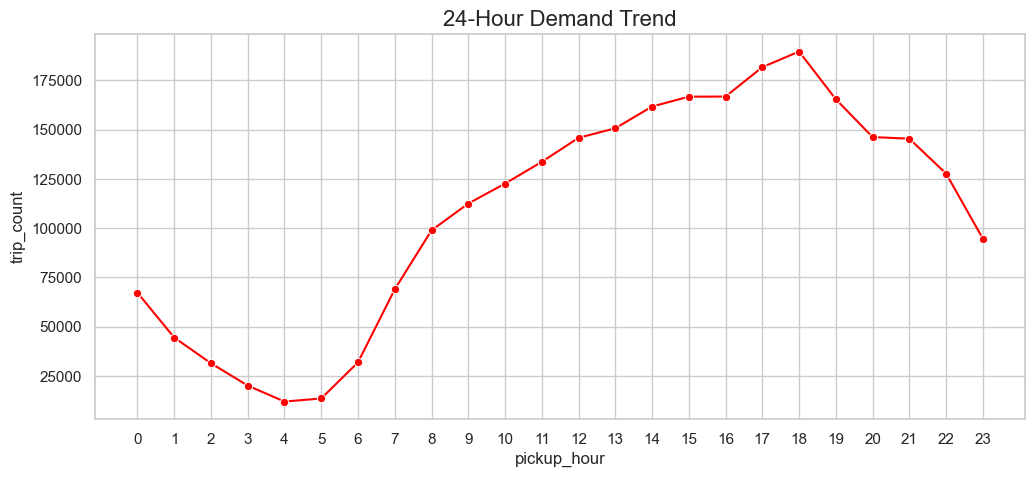

✅ Model Accuracy (R2): 0.9852

       FINAL FARE PREDICTIONS
🔹 Smooth Traffic (5mi, 12.0min): $21.92
🔹 Heavy Traffic (5mi, 45.0min): $36.72


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ==========================================
# 1. LOAD & CLEAN DATA
# ==========================================
# Assuming 'df' is already loaded from your CSV
# df = pd.read_csv('your_cleaned_data.csv')

print("🚀 Starting Full Analysis...")

# ==========================================
# 2. DATA TYPE ENFORCEMENT & FEATURE ENG.
# ==========================================
# Convert to Datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Enforce Integers
int_cols = ['VendorID', 'passenger_count', 'PULocationID', 'DOLocationID', 'payment_type']
df[int_cols] = df[int_cols].astype('int64')

# Enforce Floats
float_cols = ['trip_distance', 'fare_amount', 'total_amount', 'fare_per_mile', 'trip_duration']
df[float_cols] = df[float_cols].astype('float64')

# ==========================================
# 3. URBAN MOBILITY (TOP 10 ZONES)
# ==========================================
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['PULocationID', 'trip_count']
top_NZ_zones = pickup_counts.head(10).copy()
top_NZ_zones['PULocationID'] = top_NZ_zones['PULocationID'].astype(str)

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=top_NZ_zones, x='PULocationID', y='trip_count', hue='PULocationID', palette='viridis', legend=False)
plt.title('Top 10 Pickup Hotspots')
plt.show()

# ==========================================
# 4. PEAK HOURS ANALYSIS
# ==========================================
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_demand = df.groupby('pickup_hour').size().reset_index(name='trip_count')

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_demand, x='pickup_hour', y='trip_count', marker='o', color='red')
plt.title('24-Hour Demand Trend')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# ==========================================
# 5. MACHINE LEARNING (FARE PREDICTION)
# ==========================================
# Selecting Features and Target
X = df[['trip_distance', 'trip_duration']]
y = df['fare_amount']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multiple Linear Regression
advanced_model = LinearRegression()
advanced_model.fit(X_train, y_train)

# Accuracy Check
y_pred = advanced_model.predict(X_test)
print(f"✅ Model Accuracy (R2): {r2_score(y_test, y_pred):.4f}")

# ==========================================
# 6. FINAL PREDICTION INTERFACE
# ==========================================
def predict_smart_fare_clean(miles, minutes):
    """Predicts fare using the trained model with zero warnings."""
    input_data = pd.DataFrame([[miles, minutes]], columns=['trip_distance', 'trip_duration'])
    prediction = advanced_model.predict(input_data)
    return prediction[0]

# --- Final Test Results ---
print("\n" + "="*40)
print("       FINAL FARE PREDICTIONS")
print("="*40)
scenarios = [
    (5.0, 12.0, "Smooth Traffic"),
    (5.0, 45.0, "Heavy Traffic")
]

for d, t, label in scenarios:
    price = predict_smart_fare_clean(d, t)
    print(f"🔹 {label} (5mi, {t}min): ${price:.2f}")
print("="*40)